<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Sofía Hernández Zatarain, Gerardo Gutiérrez Estrada.

**Fecha:** 14 de marzo del 2023.

**Expediente** : 727151, 729878.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/sofiahzt/ProyectoConjunto_SHernanddez_GGutierrez

# Tarea 5: Clase 10

### Ejercicio 1:

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:

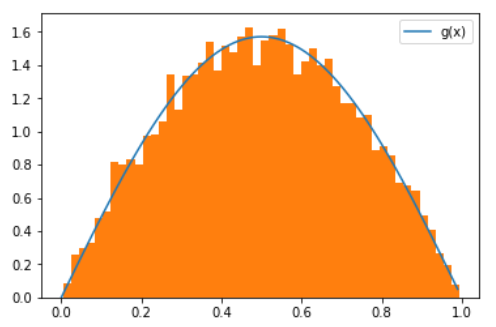

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:

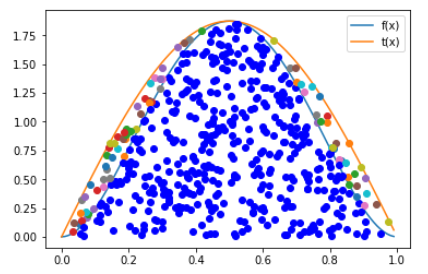

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

#### Librerías

In [3]:
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

#### Código de solución estudiante 1 - Sofía Hernández Zatarain

### 1

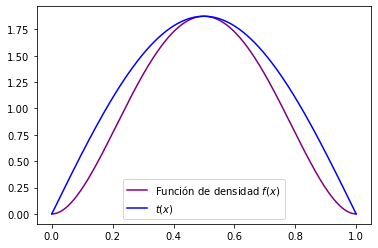

In [2]:
f = lambda x: 30 * (x**2 - 2*x**3 + x**4)

vector = np.linspace(0,1,1000)

a = f(optimize.fmin(lambda x: -f(x), 0, disp = False))
t = lambda x: a * np.sin(np.pi * x)

plt.figure() 
plt.plot(vector, f(vector), label = 'Función de densidad $f(x)$', color = "purple")
plt.plot(vector, t(vector), label = '$t(x)$', color = "blue")
plt.legend();
plt.show()

### 2

Sabemos que: 

$$ g(x) = \frac{t(x)}{c} $$

Planteamos la integral de la siguiente manera: 

$$ c \int_{0}^{1}t(x)dx $$

Es decir: 

$$ a \int_{0}^{1}\sin (\pi x)dx $$

El resultado es:

$$ \frac{a}{\pi}[-\cos(\pi x)]_{1}^{0}$$

Al evaluar los límites obtenemos:

$$ \frac{2a}{\pi} $$

Sustituyendo:

$$ g(x) = \frac{t(x)}{c}  = \frac{a\sin(\pi x)}{\frac{2a}{\pi}} = \frac{\pi}{2}\sin(\pi x)$$

### 3

Para obtener $ G(x) $ es necesario integrar nuestra función encontrada en el punto anterior, es decir:

$$ G(x) = \int_{0}^{x}\frac{\pi}{2}\sin(\pi x)dx $$

Obteniendo: 

$$ \frac{1}{2}[-\cos(\pi x)]_{0}^{x} $$

Al evaluar los límites tenemos como resultado:

$$ -\frac{1}{2}\cos(\pi x) + \frac{1}{2} $$

Simplificando e igualando a $ U $ obtenemos:

$$ U = \frac{1}{2}(-\cos(\pi x) + 1) $$

Despejando $ x $ llegamos al siguiente resultado:

$$ 2U = -\cos(\pi x) + 1 $$

$$ 2U - 1 = -\cos(\pi x) $$

$$ -cos^{-1}(2U - 1) = \pi x $$

$$ \frac{1}{\pi}(-cos^{-1}(2U - 1)) = x $$

$$ x = \frac{1}{\pi}cos^{-1}(1 - 2U) $$

### 4

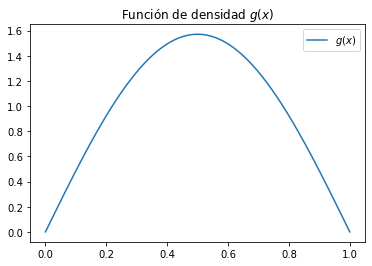

In [3]:
# Graficamos g(x)

x = np.linspace(0,1,1000)
gx = (np.pi / 2) * (np.sin(np.pi * x))

plt.figure()
plt.plot(x, gx, label = '$g(x)$')
plt.title('Función de densidad $g(x)$')
plt.legend()
plt.show()

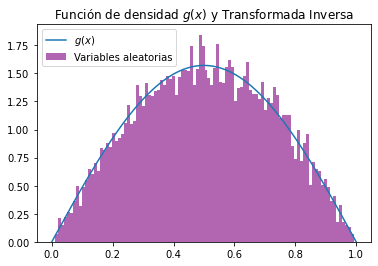

In [4]:
# Función: Valores aleatorios dentro de g(x) utilizando la transformada inversa

def transformada_inversa(n: 'Número de ensayos'):
    u = np.random.rand(n)
    return (1 / np.pi) * (np.arccos(1 - 2*u))
    
# Graficamos g(x) y las variables aleatorias

n = 10000
f = transformada_inversa(n)

plt.figure()
plt.plot(x, gx, label = '$g(x)$')
plt.hist(f, bins = 100, density = True, color = 'purple', alpha = 0.6, label = 'Variables aleatorias')
plt.title('Función de densidad $g(x)$ y Transformada Inversa')
plt.legend()
plt.show()

### 5

In [5]:
def acep_rechazo(R2: 'Variables distribuidas U~U(0,1)',
                 R1: 'Variables distribuidas como g(x)',
                 f: 'Función objetivo a generar',
                 t: 'Función que mayor a f'):

    f_x = f(R1)
    t_x = t(R1)
    condition = R2 * t_x <= f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]   
    plt.show()
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    
    return x

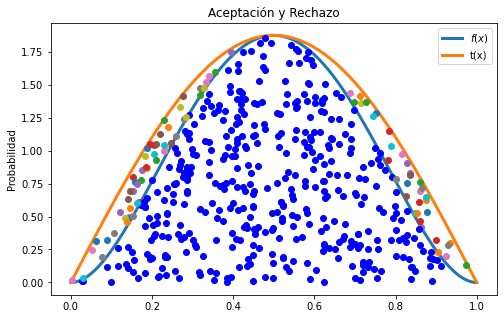

In [6]:
# Número de puntos a simular 

f = lambda x: 30 * (x**2 - 2*x**3 + x**4)
n = 500

R2 = np.random.rand(n)
R1 = transformada_inversa(n)

x = np.linspace(0, 1, 1000)

plt.figure(figsize = (8, 5))
plt.plot(x, f(x), label = '$f(x)$', lw = 3)
plt.plot(x, t(x),label='t(x)', lw = 3)
plt.title('Aceptación y Rechazo')
plt.ylabel('Probabilidad')
plt.legend()
valores_aleatorios1 = acep_rechazo(R2, R1, f, t)
plt.show()

### 6

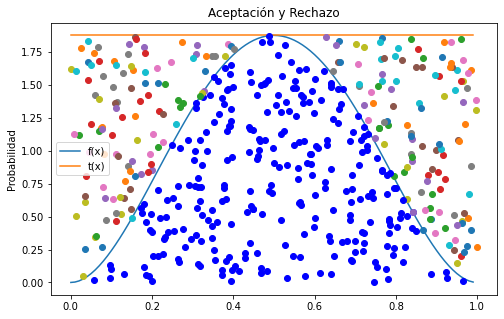

In [8]:
t = lambda x: a * np.ones(len(x))
x = np.arange(0, 1, 0.01)

plt.figure(figsize = (8, 5))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.title('Aceptación y Rechazo')
plt.ylabel('Probabilidad')
plt.legend()

n = 500
R2 = np.random.rand(n)
R1 = np.random.rand(n)

valores_aleatorios2 = acep_rechazo(R2, R1, f, t)

plt.show()

In [13]:
senoidal = len(valores_aleatorios1) / n
constante = len(valores_aleatorios2) / n

print('Porcentaje de puntos de aceptación t(x) constante:', constante * 100, '%')
print('Porcentaje de puntos de aceptación t(x) senoidal:', senoidal * 100, '%')

Porcentaje de puntos de aceptación t(x) constante: 55.400000000000006 %
Porcentaje de puntos de aceptación t(x) senoidal: 82.8 %


### 7

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

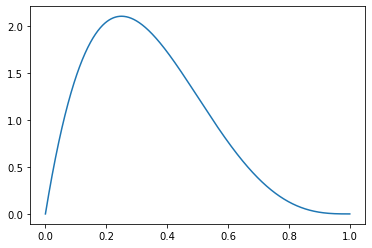

In [16]:
# Graficamos función f(x)

f = lambda x: 20 * x * (1 - x)**3
x = np.linspace(0, 1, 1000)

plt.plot(x, fun(x), label='$f(x)$')

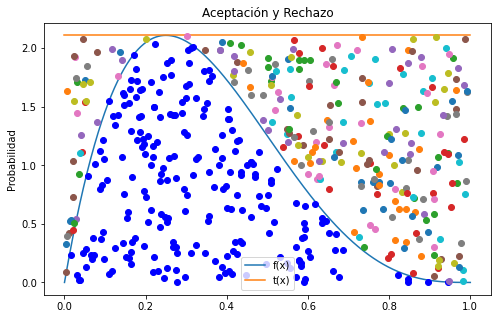

In [19]:
# Aceptación y Rechazo

max_f = f(optimize.fmin(lambda x:-f(x), 0, disp = False))
t = lambda x: max_f * np.ones(len(x))

plt.figure(figsize = (8, 5))
plt.plot(x, f(x), label='f(x)')
plt.plot(x, t(x), label='t(x)')
plt.title('Aceptación y Rechazo')
plt.ylabel('Probabilidad')
plt.legend()

n = 500
R2 = np.random.rand(n)
R1 = np.random.rand(n)

valores_aleatorios3 = acep_rechazo(R1, R2, f, t)

#### Código de solución estudiante 2 - Gerardo 


### 1

In [1]:
def Acep_rechazo3(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    return x

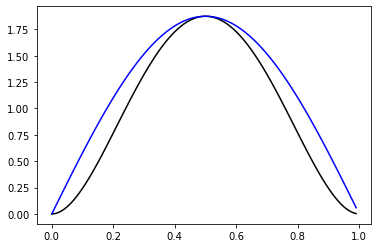

In [7]:
N = 200000 # número de puntos a simular
R2 = np.random.rand(N)
R1 = np.random.rand(N)

f = lambda x: 30*((x**2)-(2*x**3)+(x**4))
a = f(optimize.fmin(lambda x: -f(x),0, disp=False))
t = lambda x: a*np.sin(np.pi * x)

x = np.arange(0,1,0.01)

plt.plot(x,f(x),'k')
plt.plot(x,t(x),'b')

x = Acep_rechazo3(R2, R1, f, t)

### 2

$$ g(x) = \frac{t(x)}{c} $$

$$ a \int_{0}^{1}\sin (\pi x)dx $$

$$ \frac{a}{\pi}[-\cos(\pi x)]_{1}^{0} = \frac{2a}{\pi} $$

$$ g(x) = \frac{t(x)}{c}  = \frac{a\sin(\pi x)}{\frac{2a}{\pi}} = \frac{1}{2}\pi \sin(\pi x)$$

### 3

$$ G(x) = \int_{0}^{x}\frac{\pi}{2}\sin(\pi x)dx = \frac{1}{2}[-\cos(\pi x)]_{0}^{x} $$

$$ -\frac{1}{2}\cos(\pi x) + \frac{1}{2} $$

$$ U = \frac{1}{2}(-\cos(\pi x) + 1) $$

$$ 2U = -\cos(\pi x) + 1 $$

$$ 2U - 1 = -\cos(\pi x) $$

$$ -cos^{-1}(2U - 1) = \pi x $$

$$ \frac{1}{\pi}(-cos^{-1}(2U - 1)) = x $$

$$ x = \frac{1}{\pi}cos^{-1}(1 - 2U) $$

### 4

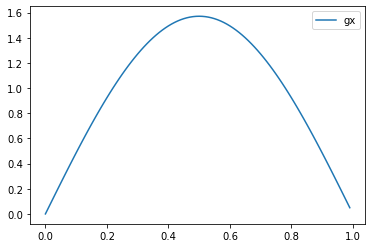

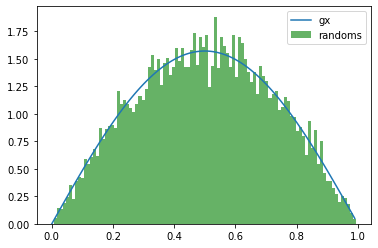

In [20]:
x = np.arange(0,1,0.01)
gx = (np.pi / 2) * (np.sin(np.pi * x))

plt.figure()
plt.plot(x, gx, label = "gx")
plt.legend()
plt.show()

def funcion(n):
    u = np.random.rand(n)
    return (1 / np.pi) * (np.arccos(1 - 2*u))
    
f = funcion(10000)

plt.figure()
plt.plot(x, gx, label = 'gx')
plt.hist(f, bins = 100, density = True, color = 'green', alpha = 0.6, label = 'randoms')
plt.legend()
plt.show()

### 5